In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1.Load data

In [19]:
DATA_PATH = '.'
train = pd.read_csv(f'{DATA_PATH}/train.csv')
test = pd.read_csv(f'{DATA_PATH}/test.csv')

## 2.Data EDA

In [20]:
len(train), len(test)

(1176, 294)

In [21]:
train.head()

,user_id,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1374,58,No,Travel_Rarely,605,Sales,21,3,Life Sciences,1,...,3,80,1,29,2,2,1,0,0,0
1,1092,45,No,Travel_Rarely,950,Research & Development,28,3,Technical Degree,1,...,4,80,1,8,3,3,5,4,0,3
2,768,40,No,Travel_Rarely,300,Sales,26,3,Marketing,1,...,2,80,1,8,3,2,7,7,7,5
3,569,36,No,Non-Travel,1434,Sales,8,4,Life Sciences,1,...,2,80,0,10,1,3,10,7,0,9
4,911,25,Yes,Travel_Frequently,599,Sales,24,1,Life Sciences,1,...,4,80,0,1,4,3,1,0,1,0


In [22]:
test.head()

,user_id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,442,36,Non-Travel,635,Sales,10,4,Medical,1,592,...,4,80,0,10,3,2,10,3,9,7
1,1091,33,Travel_Rarely,575,Research & Development,25,3,Life Sciences,1,1545,...,4,80,0,5,2,3,5,3,0,2
2,981,35,Travel_Frequently,662,Sales,18,4,Marketing,1,1380,...,3,80,1,5,0,2,4,2,3,2
3,785,40,Travel_Rarely,1492,Research & Development,20,4,Technical Degree,1,1092,...,4,80,1,14,6,3,11,10,11,1
4,1332,29,Travel_Frequently,459,Research & Development,24,2,Life Sciences,1,1868,...,2,80,0,1,3,2,1,0,1,0


### 2.1 Check all the columns

In [23]:
train.info()
#user_id:员工Id(str) Age:年龄(int) Attrition:是否离职(bool) BusinessTravel:出差情况(categorical) 
#DailyRate：？(int) Department: 部门(categorical) DistanceFromHome:居住地与工作单位距离(int) Education:教育时间(int)
#EducationField:教育背景(categorical) EmployeeCount:?(int) EmployeeNumber:员工号码(int) EnvironmentSatisfaction:环境满意度(int/categorical)
#Gender:性别(bool) HourlyRate:?(int) JobInvolvement:工作投入度(int) JobLevel:职位等级(categorical) JobRole:职位
#JobSatisfaction:工作满意度(int/categorical) MaritalStatus:婚姻状态(bool) MonthlyIncome:月收入(int) MonthlyRate:?(int)
#NumCompaniesWorked:任职过的公司数(int) Over18:是否成年(bool) OverTime:是否加班(bool) PercentSalaryHike:工资提高比率(int)
#PerformanceRating:绩效评估(int) RelationshipSatisfaction:人际关系满意度(int) StandardHours:标准工作时间(int)
#StockOptionLevel:股票占有等级(int) TotalWorkingYears:总计工作年数(int) TrainingTimeLastYear:去年培训时长(int)
#WorkLifeBalance:工作生活平衡情况(int) #YearsAtCompany:在公司工作年数(int) #YearsInCurrentRole:在这一职位时长(int)
#YearsSinceLastPromotion:距离上一次升职时间(int) YearsWithCurrManager:与同一上级工作时长(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1176 entries, 0 to 1175
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   user_id                   1176 non-null   int64 
 1   Age                       1176 non-null   int64 
 2   Attrition                 1176 non-null   object
 3   BusinessTravel            1176 non-null   object
 4   DailyRate                 1176 non-null   int64 
 5   Department                1176 non-null   object
 6   DistanceFromHome          1176 non-null   int64 
 7   Education                 1176 non-null   int64 
 8   EducationField            1176 non-null   object
 9   EmployeeCount             1176 non-null   int64 
 10  EmployeeNumber            1176 non-null   int64 
 11  EnvironmentSatisfaction   1176 non-null   int64 
 12  Gender                    1176 non-null   object
 13  HourlyRate                1176 non-null   int64 
 14  JobInvolvement          

In [24]:
#0.80
id_col = 'user_id'
target_col = 'Attrition'

digital_cols = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
category_cols = ['BusinessTravel', 'Department',  'Education', 'EducationField',
                'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel','DistanceFromHome',
                'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
                'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'PerformanceRating', 'TrainingTimesLastYear','WorkLifeBalance' ]

### 2.2 Nan and unique values

In [25]:
# Credits to https://www.kaggle.com/a763337092/lr-baseline-for-bi-class#Data-process
# For categorical data
for col in category_cols:
    nunique_tr = train[col].nunique()
    nunique_te = test[col].nunique()
    na_tr = len(train.loc[train[col].isna()]) / len(train)
    na_te = len(test.loc[test[col].isna()]) / len(test)
    print(f'Col name:{col:30}\tunique cate num in train:{nunique_tr:5}\tunique cate num in train:{nunique_te:5}\tnull sample in train:{na_tr:.2f}\tnull sample in test:{na_te:.2f}')

Col name:BusinessTravel                	unique cate num in train:    3	unique cate num in train:    3	null sample in train:0.00	null sample in test:0.00
Col name:Department                    	unique cate num in train:    3	unique cate num in train:    3	null sample in train:0.00	null sample in test:0.00
Col name:Education                     	unique cate num in train:    5	unique cate num in train:    5	null sample in train:0.00	null sample in test:0.00
Col name:EducationField                	unique cate num in train:    6	unique cate num in train:    6	null sample in train:0.00	null sample in test:0.00
Col name:EmployeeNumber                	unique cate num in train: 1176	unique cate num in train:  294	null sample in train:0.00	null sample in test:0.00
Col name:EnvironmentSatisfaction       	unique cate num in train:    4	unique cate num in train:    4	null sample in train:0.00	null sample in test:0.00
Col name:Gender                        	unique cate num in train:    2	unique cate

	In train data:	nan sample rate:0.00	
	In test data	nan sample rate:0.00	
	In train data:	nan sample rate:0.00	
	In test data	nan sample rate:0.00	
	In train data:	nan sample rate:0.00	
	In test data	nan sample rate:0.00	
	In train data:	nan sample rate:0.00	
	In test data	nan sample rate:0.00	
	In train data:	nan sample rate:0.00	
	In test data	nan sample rate:0.00	
	In train data:	nan sample rate:0.00	
	In test data	nan sample rate:0.00	
	In train data:	nan sample rate:0.00	
	In test data	nan sample rate:0.00	
	In train data:	nan sample rate:0.00	
	In test data	nan sample rate:0.00	
	In train data:	nan sample rate:0.00	
	In test data	nan sample rate:0.00	
	In train data:	nan sample rate:0.00	
	In test data	nan sample rate:0.00	


<function matplotlib.pyplot.show(close=None, block=None)>

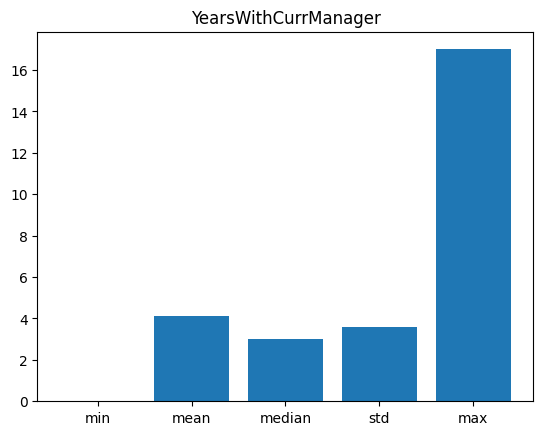

In [26]:
#For numerical data

for col in digital_cols:
    
    min_tr = train[col].min()
    max_tr = train[col].max()
    mean_tr = train[col].mean()
    median_tr = train[col].median()
    std_tr = train[col].std()
    x = ['min','mean','median','std','max']
    y = [min_tr,mean_tr,median_tr,std_tr,max_tr]

    
    
    min_te = test[col].min()
    max_te = test[col].max()
    mean_te = test[col].mean()
    median_te = test[col].median()
    std_te = test[col].std()
    x = ['min','mean','median','std','max']
    y = [min_tr,mean_tr,median_tr,std_tr,max_tr]
    
    na_tr = len(train.loc[train[col].isna()]) / len(train)
    na_te = len(test.loc[test[col].isna()]) / len(test)
    print(f'\tIn train data:\tnan sample rate:{na_tr:.2f}\t')
    print(f'\tIn test data\tnan sample rate:{na_te:.2f}\t')
plt.bar(x, y)
plt.title(col)
plt.show

### 2.3 Visualization

0        No
1        No
2        No
3        No
4       Yes
       ... 
1171     No
1172     No
1173     No
1174     No
1175     No
Name: Attrition, Length: 1176, dtype: object


C:\Users\Tiffany\AppData\Local\Temp\ipykernel_62576\3973910140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Attrition', y='Age', data = train , palette = 'Set2')


<Axes: xlabel='Attrition', ylabel='Age'>

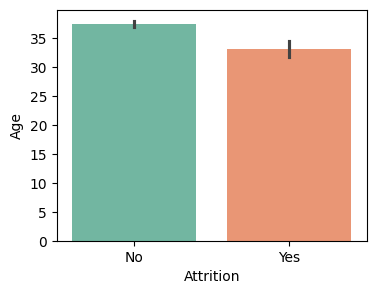

In [27]:
#age and attrition
plt.figure(figsize=(4,3))
print(train['Attrition'])
sns.barplot(x='Attrition', y='Age', data = train , palette = 'Set2')

#### HeatMap of Correlations

In [33]:
print(train.dtypes)

user_id                      int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel    

ValueError: could not convert string to float: 'No'

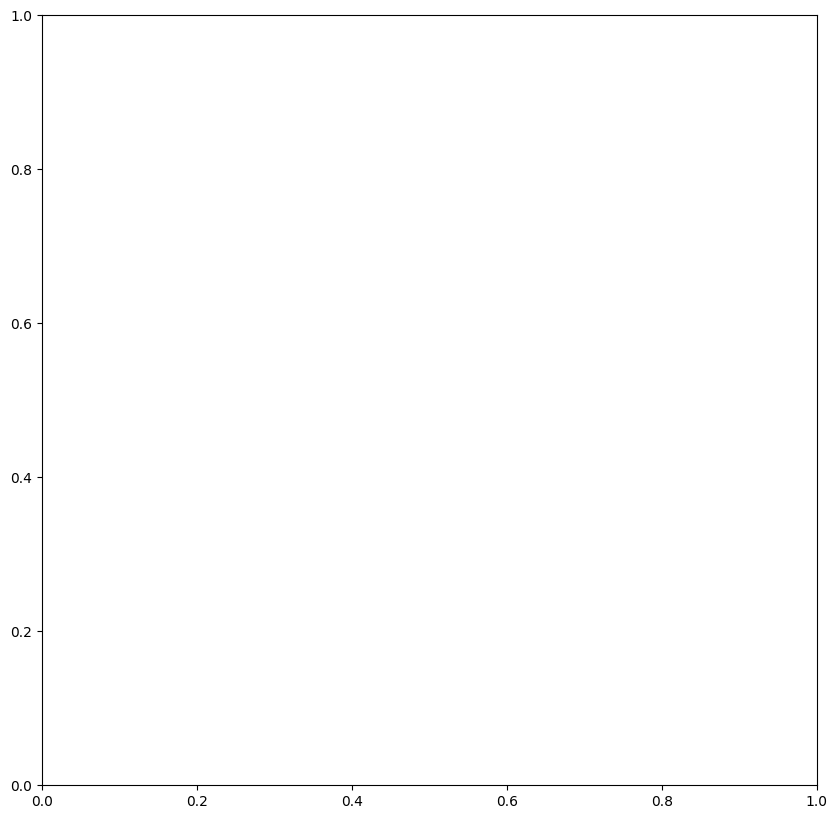

In [35]:
figure, ax = plt.subplots(figsize=(10, 10))
data = pd.concat([train.drop(['EmployeeNumber','EmployeeCount', 'Over18','StandardHours'],axis = 1), test]).corr() ** 2
# data = np.tril(data, k=-1)
data[data==0] = np.nan
sns.heatmap(np.sqrt(data), annot=False, cmap='viridis', ax=ax)

#### Correlation between vars and target

In [30]:
print(type(data))

NameError: name 'data' is not defined

## 3.Data preprocessing

In [36]:
train = pd.read_csv(f'{DATA_PATH}/train.csv')
target_col_dict = {'Yes': 1, 'No': 0}
train1 = train
train1['Attrition'] = train1['Attrition'].map(target_col_dict).values
train2 = train1
#train2.drop(['Attrition'])
data = train2.corrwith(train1['Attrition']).agg('square')
data = data.drop('Attrition')
figure, ax = plt.subplots(figsize=(10, 10))
data.agg('sqrt').plot.bar(ax=ax)
# del data

TypeError: unsupported operand type(s) for /: 'str' and 'int'

### For digital cols

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sacalar = MinMaxScaler()
train_digital = sacalar.fit_transform(train[digital_cols])
test_digital = sacalar.transform(test[digital_cols])


In [ ]:
import warnings
# 忽略所有警告
warnings.filterwarnings("ignore")

### For categorical cols

In [ ]:
# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# train_category, test_category = None, None
# drop_cols = ['EmployeeNumber', 'Over18', 'StandardHours']
# for col in [var for var in category_cols if var not in drop_cols]:
#     lbe, ohe = LabelEncoder(), OneHotEncoder()
    
#     lbe.fit(pd.concat([train[col], test[col]]).values.reshape(-1, 1))
#     train[col] = lbe.transform(train[col])
#     test[col] = lbe.transform(test[col])
    
#     ohe.fit(pd.concat([train[col], test[col]]).values.reshape(-1, 1))
#     oht_train = ohe.transform(train[col].values.reshape(-1, 1)).todense()
#     oht_test = ohe.transform(test[col].values.reshape(-1, 1)).todense()
    
#     if train_category is None:
#         train_category = oht_train
#         test_category = oht_test
#     else:
#         train_category = np.hstack((train_category, oht_train))
#         test_category = np.hstack((test_category, oht_test))

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# 假设 train 和 test 数据集已经加载
# train = pd.read_csv('train.csv')
# test = pd.read_csv('test.csv')

# 假设 category_cols 是分类特征列名的列表
# category_cols = ['Feature1', 'Feature2', 'Feature3']

train_category, test_category = None, None
drop_cols = ['EmployeeNumber', 'Over18', 'StandardHours', 'BusinessTravel']

for col in [var for var in category_cols if var not in drop_cols]:
    lbe, ohe = LabelEncoder(), OneHotEncoder()
    
    # 拟合标签编码器
    lbe.fit(pd.concat([train[col], test[col]]).values.reshape(-1, 1))
    train[col] = lbe.transform(train[col])
    test[col] = lbe.transform(test[col])
    
    # 拟合独热编码器
    ohe.fit(pd.concat([train[col], test[col]]).values.reshape(-1, 1))
    oht_train = ohe.transform(train[col].values.reshape(-1, 1)).todense()
    oht_test = ohe.transform(test[col].values.reshape(-1, 1)).todense()
    
    if train_category is None:
        train_category = oht_train
        test_category = oht_test
    else:
        train_category = np.hstack((train_category, oht_train))
        test_category = np.hstack((test_category, oht_test))

# 打印第一个样本的独热编码特征
print(train_category[0, :])

# 处理 BusinessTravel 特征
lbe.fit(pd.concat([train['BusinessTravel'], test['BusinessTravel']]).values.reshape(-1, 1))
BT_train = lbe.transform(train['BusinessTravel'])
BT_test = lbe.transform(test['BusinessTravel'])

# 将 BusinessTravel 特征插入到独热编码矩阵的第一列
train_category = np.insert(train_category, 0, values=BT_train, axis=1)
test_category = np.insert(test_category, 0, values=BT_test, axis=1)

# 打印处理后的独热编码矩阵
print(train_category)

[[0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
  1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0.
  0.]]
[[2. 0. 0. ... 1. 0. 0.]
 [2. 0. 1. ... 0. 1. 0.]
 [2. 0. 0. ... 1. 0. 0.]
 ...
 [2. 0. 0. ... 0. 1. 0.]
 [2. 0. 1. ... 0. 0. 0.]
 [2. 0. 0. ... 1. 0. 0.]]


In [ ]:
train_digital.shape, test_digital.shape, train_category.shape, test_category.shape

((1176, 10), (294, 10), (1176, 98), (294, 98))

In [ ]:
feature_names = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
                'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField',
                'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
                'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
                'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TrainingTimesLastYear',
                'WorkLifeBalance']

In [ ]:
train_features = np.hstack((train_digital, train_category))
test_features = np.hstack((test_digital, test_category))
train_features.shape, test_features.shape

((1176, 108), (294, 108))

In [ ]:
# target_col_dict = {'Yes': 1, 'No': 0}
# train_labels = train[target_col].map(target_col_dict).values
train_labels = train[target_col]
train_labels.shape

(1176,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.20, random_state=42)

### SMOTE Upsampling

In [ ]:
from imblearn.over_sampling import KMeansSMOTE
sm = KMeansSMOTE(random_state=42 ,cluster_balance_threshold = 0.3, k_neighbors=2)
X_res, y_res = sm.fit_resample(X_train, y_train)

from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# from imblearn.over_sampling import ADASYN
# ad = ADASYN(random_state  = 42)
# X_res, y_res = ad.fit_resample(X_train, y_train)

# from imblearn.combine import SMOTEENN
# sme = SMOTEENN(random_state = 42)
# X_res, y_res = sme.fit_resample(X_train, y_train)

## 4.Using Xgboost on validation set

### Split validation set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.20, random_state=42)

In [ ]:
X_train.shape,X_val.shape,y_train.shape,y_val.shape

((940, 108), (236, 108), (940,), (236,))

### PCA

In [ ]:
from sklearn.decomposition import PCA
#pca = PCA(n_components = 'mle')
pca = PCA(n_components = 108)
X_val_new = pca.fit_transform(X_val)
train_features_new = pca.fit_transform(train_features)
test_features_new = pca.fit_transform(test_features)
X_train_new = pca.fit_transform(X_train)
print('保留的特征数：')
print(pca.n_components_)
print('特征所占比重分别为：')
print(pca.explained_variance_ratio_)
print('特征所占比重之和：')
print(sum(pca.explained_variance_ratio_))

# X_train_new 的形状为 (940, 108)。
# X_val_new 的形状为 (236, 108)。
# 如果你选择了小于 108 的 n_components，降维后的特征数会相应减少。

保留的特征数：
108
特征所占比重分别为：
[6.41066356e-02 5.91590064e-02 4.29260102e-02 3.87049094e-02
 3.47790232e-02 3.35298241e-02 3.29385384e-02 3.21267480e-02
 3.09227147e-02 2.94074366e-02 2.90420905e-02 2.83033564e-02
 2.64374980e-02 2.56184162e-02 2.48958720e-02 2.37128435e-02
 2.27873577e-02 2.07571352e-02 2.06378661e-02 1.95034321e-02
 1.92970220e-02 1.70781907e-02 1.61645120e-02 1.56780282e-02
 1.49932710e-02 1.40469516e-02 1.34743221e-02 1.24182642e-02
 1.19824382e-02 1.18471471e-02 1.07822505e-02 1.07192144e-02
 1.00175877e-02 9.44916903e-03 8.79444068e-03 8.06313494e-03
 7.79994820e-03 7.34648907e-03 7.14231267e-03 6.66134671e-03
 6.35106265e-03 6.14744785e-03 5.80213629e-03 5.64835632e-03
 5.54523198e-03 5.21731852e-03 4.98472279e-03 4.69676093e-03
 4.50158318e-03 4.40527763e-03 4.37331126e-03 4.22247833e-03
 4.09725307e-03 3.93339466e-03 3.80548723e-03 3.64792502e-03
 3.20785941e-03 3.05707023e-03 2.94439842e-03 2.59867228e-03
 2.49610628e-03 2.37610955e-03 2.17098232e-03 1.90435133e-03
 

### 4.1 Settings

In [ ]:
### fit model for train data
import xgboost as xgb
#dataset
dtrain = xgb.DMatrix(X_train, label = y_train)

#parameters
num_round = 500
param = {'bst:max_depth':2, 'bst:eta':1, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 2
param['eval_metric'] = 'auc'
plst = param.items()

matrix([[0.30952381, 0.83870968, 0.50758294, ..., 0.        , 0.        ,
         1.        ],
        [0.52380952, 0.87311828, 0.09478673, ..., 0.        , 1.        ,
         0.        ],
        [0.5952381 , 0.85089606, 0.87382833, ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.85714286, 0.21003584, 0.5116377 , ..., 0.        , 0.        ,
         1.        ],
        [0.19047619, 0.03799283, 0.09784097, ..., 1.        , 0.        ,
         0.        ],
        [0.35714286, 0.62078853, 0.17340706, ..., 0.        , 1.        ,
         0.        ]])

In [ ]:
np.any(np.isnan(y_train))

False

### 4.2 Training

In [ ]:
print(dtrain)

In [ ]:
print(plst)

dict_items([('bst:max_depth', 2), ('bst:eta', 1), ('silent', 1), ('objective', 'binary:logistic'), ('nthread', 2), ('eval_metric', 'auc')])


### xgb

In [ ]:
bst = xgb.train(plst, dtrain, num_round)
#save the model
bst.save_model('0001.model')

### 4.3 Prediction

In [ ]:
dtest = xgb.DMatrix(X_val)
ypred = bst.predict(dtest)

### 4.4 Evaluation

In [ ]:
test_auc = metrics.roc_auc_score(y_val,ypred)#验证集上的auc值
print(test_auc)

0.8200371057513913


In [ ]:
#xgb
import xgboost as xgb  # XGBoost模型
from sklearn.metrics import roc_auc_score
# 定义 XGBoost 模型（使用默认参数）
xgb_model = xgb.XGBClassifier(random_state=42)

# 训练模型
xgb_model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred_proba = xgb_model.predict_proba(X_val)[:, 1]  # 获取正类的概率

# 输出测试集 AUC
print("测试集 AUC: ", roc_auc_score(y_val, y_pred_proba))


测试集 AUC:  0.8142529739168394


In [ ]:
### 网格搜索
import xgboost as xgb  # XGBoost模型
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
# 定义 XGBoost 模型
xgb_model = xgb.XGBClassifier(random_state=42)

# 定义参数网格
param_grid = {
    'max_depth': [3, 6, 9],  # 树的最大深度
    'learning_rate': [0.01, 0.1, 0.3],  # 学习率
    'n_estimators': [100, 200, 300],  # 树的数量
    'subsample': [0.8, 1.0],  # 样本采样比例
    'colsample_bytree': [0.8, 1.0]  # 特征采样比例
}

# 初始化网格搜索
grid_search = GridSearchCV(
    estimator=xgb_model,  # 模型
    param_grid=param_grid,  # 参数网格
    cv=5,  # 五折交叉验证
    scoring='roc_auc',  # 使用 AUC 作为评估指标
    n_jobs=-1  # 使用所有可用的CPU核心
)

# 在训练集上执行网格搜索
grid_search.fit(X_train, y_train)

# 输出最佳参数
print("最佳参数组合:", grid_search.best_params_)

# 使用最佳参数训练模型
best_xgb = grid_search.best_estimator_

# 在测试集上进行预测
y_pred_proba = best_xgb.predict_proba(X_val)[:, 1]  # 获取正类的概率
y_pred_lr = best_xgb.predict(X_val)

# 输出混淆矩阵
print("Confusion Matrix:\n", confusion_matrix(y_val, y_pred_lr))

# 输出分类报告
print("Classification Report:\n", classification_report(y_val, y_pred_lr))

# 输出测试集 AUC
print("测试集 AUC: ", roc_auc_score(y_val, y_pred_proba))

最佳参数组合: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Confusion Matrix:
 [[181   6]
 [ 32  17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       187
           1       0.74      0.35      0.47        49

    accuracy                           0.84       236
   macro avg       0.79      0.66      0.69       236
weighted avg       0.83      0.84      0.82       236

测试集 AUC:  0.8057404780093856


### XGBClassifier

In [ ]:
from xgboost import XGBClassifier

bst2 = XGBClassifier(#learning_rate=0.08,
                      n_estimators=300,         # 树的个数--300棵树建立xgboost
                      #max_depth=3,               # 树的深度
                      #min_child_weight = 1,      # 叶子节点最小权重
                      #gamma=0.3,                  # 惩罚项中叶子结点个数前的参数
                      #subsample=0.8,             # 随机选择80%样本建立决策树
                      #colsample_btree=0.8,       # 随机选择80%特征建立决策树
#                       objective='binary:logistic', # 指定损失函数
#                       scale_pos_weight=1,        # 解决样本个数不平衡的问题
                       random_state=42            # 随机数
                      )
bst2.fit(X_train,
          y_train,
           eval_set = [(X_val,y_val)],
           eval_metric = "auc",
          #early_stopping_rounds = 10,
          verbose = False)
#save the model
bst2.save_model('0002.model')

ypred2 = bst2.predict_proba(X_val)[:,1]
test_auc = metrics.roc_auc_score(y_val,ypred2)#验证集上的auc值
print(test_auc)

0.8204736440030558


In [ ]:
# 看一下其他参数的训练效果
from xgboost import XGBClassifier

bst2 = XGBClassifier(learning_rate=0.1,
                      n_estimators=100,         # 树的个数--300棵树建立xgboost
                      max_depth=3,               # 树的深度
                      min_child_weight = 1,      # 叶子节点最小权重
                      gamma=0.3,                  # 惩罚项中叶子结点个数前的参数
                      subsample=0.8,             # 随机选择80%样本建立决策树
                      colsample_btree=0.8,       # 随机选择80%特征建立决策树
                       objective='binary:logistic', # 指定损失函数
                       scale_pos_weight=1,        # 解决样本个数不平衡的问题
                       random_state=42            # 随机数
                      )
bst2.fit(X_train,
          y_train,
          #  eval_set = [(X_val,y_val)],
          #  eval_metric = "auc",
          # early_stopping_rounds = 10,
          verbose = False)
#save the model
bst2.save_model('0002.model')

ypred2 = bst2.predict_proba(X_val)[:,1]
test_auc = metrics.roc_auc_score(y_val,ypred2)#验证集上的auc值
print(test_auc)

0.8175270108043218


### 4.5 Explore the features

#### Feature importance Using Xgboost

In [ ]:
from sklearn.preprocessing import minmax_scale
feature_importance = bst.get_score(importance_type = 'total_cover')
feature_values = list(feature_importance.values())
feature_keys = list(feature_importance.keys())
original_importance_sort = np.sort(feature_values)[::-1]
new_dict = {v : k for k, v in feature_importance.items()} #key,value 互换位置
feature_label = []
for i in range(len(new_dict)): feature_label.append(new_dict[original_importance_sort[i]])
print(feature_label)
print(feature_keys)
feature_importance = np.sort(minmax_scale(feature_values,feature_range = (0,1)))[::-1]
print(feature_importance)



from xgboost import plot_importance
fig,ax = plt.subplots(figsize=(15,15))
plot_importance(bst,
                height=0.5,
                ax=ax,
                max_num_features=64)

### Feature Selection

In [ ]:
feature_importance_per = feature_importance / sum(feature_importance)
print(feature_importance_per)

threshold = 0.95
#根据重要性阈值选择前N个特征
def TopiElements(feature_importance_per,threshold):
    score = 0
    for i in range(len(feature_importance_per)):
        if score < threshold:
            score += feature_importance_per[i]
        else:
            return i+1
def TopiFeaturesName(feature_label,feature_importance_per,threshold):
    return feature_label[0:TopiElements(feature_importance_per,threshold)-1]
print('共有',TopiElements(feature_importance_per,threshold),'个特征')
TopiFeatures = TopiFeaturesName(feature_label,feature_importance_per,threshold)
print(TopiFeatures)

In [ ]:
#输入features为矩阵,返回值为矩阵
def GenerateNewFeatures(features,TopiFeatures):
    feature_columns = []
    for i in range(110): feature_columns.append('f{}'.format(i))
    train_Features = pd.DataFrame(features,columns = [feature_columns])
    train_Features.head()
    new_train_Features = train_Features[TopiFeatures]
    return new_train_Features.values

In [ ]:
new_train_features = GenerateNewFeatures(train_features,TopiFeatures)
new_test_features = GenerateNewFeatures(test_features,TopiFeatures)

#### Use SelectFromModel to select

In [ ]:
# from sklearn.feature_selection import SelectFromModel

# thresholds = sorted(bst2.feature_importances_)
# for thresh in thresholds:
#     # select features using threshold
#     selection = SelectFromModel(bst2, threshold=thresh, prefit=True)
#     select_X_train = selection.transform(X_train)
#     # train model
#     selection_model = XGBClassifier()
#     selection_model.fit(select_X_train, y_train)
#     # eval model
#     select_X_val = selection.transform(X_val)
#     ypred2 = selection_model.predict(select_X_val)
#     predictions = [round(value) for value in ypred2]
#     auc = metrics.roc_auc_score(y_val,ypred2)
#     print("Thresh=%.3f, n=%d, auc: %.2f%%" % (thresh, select_X_train.shape[1], auc))


### Calculate model ACC

In [ ]:
threshold_res = 0.5
def EncodeResult(threshold, results):
    encodeResult = []
    for i in range(len(results)):
        encodeResult.append(1) if results[i] > threshold else encodeResult.append(0)
    return encodeResult

### 4.6 Try xgb model with New Features

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(new_train_features, train_labels, test_size=0.20, random_state=42)
#dataset
dtrain = xgb.DMatrix(X_train, label = y_train)

#parameters
num_round = 300
param = {'bst:max_depth':3, 'bst:eta':1, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 2
plst = param.items()

bst = xgb.train(plst, dtrain, num_round)
#save the model
bst.save_model('0001.model')

dtest = xgb.DMatrix(X_val)
ypred = bst.predict(dtest)

test_auc = metrics.roc_auc_score(y_val,ypred)#验证集上的auc值
print(test_auc)
print(ypred)
encode_result = EncodeResult(threshold_res,ypred)
print(encode_result)
test_acc = metrics.accuracy_score(y_val,encode_result)
print(test_acc)

## 5.LR on validation set

#### After Feature Selection

In [ ]:
from sklearn.linear_model import LinearRegression

clf_after = LinearRegression()
clf_after.fit(X_train, y_train)

In [ ]:
ypred = clf_after.predict(X_val)
ypred.shape
test_auc = metrics.roc_auc_score(y_val,ypred)#验证集上的auc值
print(test_auc)

#### Before Feature Selection

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.20, random_state=42)
clf = LinearRegression()
clf.fit(X_train, y_train)
ypred = clf.predict(X_val)
ypred.shape
test_auc = metrics.roc_auc_score(y_val,ypred)#验证集上的auc值
print(test_auc)

## 6. RandomForest

#### Before Feature Selection

In [ ]:
#X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.20, random_state=42)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=0,max_features = 0.40)
rf.fit(X_train,y_train)
ypred = rf.predict(X_val)
test_auc = metrics.roc_auc_score(y_val,ypred)#验证集上的auc值
print('Random forest auc:',test_auc)
#print('acc:',metrics.accuracy_score(y_val,ypred))
#print(ypred)

#### After Feature Selection

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(new_train_features, train_labels, test_size=0.20, random_state=42)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=0,max_features = 0.30)
rf.fit(X_train,y_train)
ypred = rf.predict(X_val)
test_auc = metrics.roc_auc_score(y_val,ypred)#验证集上的auc值
print('auc:',test_auc)
print('acc:',metrics.accuracy_score(y_val,ypred))

## 7. Ensemble-----classification

In [ ]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, clone
from sklearn.pipeline import make_pipeline
import xgboost as xgb

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.20, random_state=42)
n_folds = 5
def acc_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train)
    acc= cross_val_score(model, X_train, y_train, scoring="accuracy", cv = kf)
    return(acc)

#### Adaboost

In [ ]:
Adaboost = make_pipeline(RobustScaler(),
                         AdaBoostClassifier(base_estimator=None,
                                            n_estimators = 56,
                                            learning_rate= 0.18,
                                            algorithm='SAMME.R',
                                            random_state = 1)
                        )

#### Gradient Boosting

In [ ]:
GBoosting = make_pipeline(RobustScaler(), 
                          GradientBoostingClassifier(loss='deviance',
                                                     learning_rate = 0.05,
                                                     n_estimators = 56,
                                                     min_samples_split = 9,
                                                     min_samples_leaf = 2,
                                                     max_depth = 4,
                                                     random_state = 1,
                                                     max_features = 9)
                         )

#### SVC

In [ ]:
SVC =  make_pipeline(RobustScaler(), 
                     SVC(decision_function_shape = 'ovr',
                         random_state = 1,
                         max_iter = 14888,
                         kernel = 'poly',
                         degree = 2,
                         coef0 = 0.49, 
                         C =  9.6)
                     )

#### Random Forest

In [ ]:
RF = make_pipeline(RobustScaler(), 
                   RandomForestClassifier(criterion='gini', 
                                          n_estimators=364,
                                          max_depth = 11,                    
                                          min_samples_split=6,
                                          min_samples_leaf=1,
                                          max_features='auto',
                                          oob_score=True,
                                          random_state=1,
                                          )
                  )

#### XGBOOST

In [ ]:
xgbc = make_pipeline(RobustScaler(), 
                     xgb.XGBClassifier(n_estimators=121,
                                       reg_lambda = 0.9,
                                       reg_alpha = 0.5,
                                       max_depth = 9,
                                       learning_rate = 0.55,
                                       gamma = 0.5,
                                       colsample_bytree = 0.4,
                                       coldsample_bynode = 0.15,
                                       colsample_bylevel = 0.5)
                    )

#### Scores

In [ ]:
score = acc_cv(Adaboost)
print("Adaboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = acc_cv(GBoosting)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = acc_cv(SVC)
print("SVC  score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = acc_cv(RF)
print("Random Forest score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = acc_cv(xgbc)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

### Average ensembling

### original

In [ ]:
class AveragingModels(BaseEstimator):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)

In [ ]:
%%capture
averaged_models = AveragingModels(models = (Adaboost,SVC, GBoosting, RF,xgbc))
averaged_models.fit(X_train, y_train)
#predict
train_pred = averaged_models.predict(X_train)
test_pred = averaged_models.predict(X_val)

In [ ]:
test_pred.shape
print('ensemble_auc:', metrics.roc_auc_score(y_val,test_pred))

In [ ]:
# train_pred = np.round(train_pred)
# test_pred = np.round(test_pred)

acc_averaged = np.round((train_pred==y_train).sum()/train_pred.shape[0],5)
print(f"Averaged models accuracy: {acc_averaged}")

## 8.LightGBM

In [ ]:
#new features
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(new_train_features, train_labels, test_size=0.20, random_state=42)

In [ ]:
#old features
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.20, random_state=42)

In [ ]:
from pandas import DataFrame
X_train = DataFrame(X_train, index = None)
y_train = DataFrame(y_train, index = None)
X_val = DataFrame(X_val,index = None)
y_val = DataFrame(y_val,index = None)

In [ ]:
import lightgbm as lgb
train_data = lgb.Dataset(data = X_train, label = y_train)
test_data = lgb.Dataset(data = X_val, label = y_val)
# parameters
param = {'num_leaves':20, 'num_trees':300, 'objective':'binary'}
param['metric'] = ['binary_logloss']
# use test_data as validation dataset
num_round = 100
bst = lgb.train(param, train_data, num_round, valid_sets = test_data, early_stopping_rounds =10)
y_pred = bst.predict(X_val)
print('lightGBM_auc:', metrics.roc_auc_score(y_val,y_pred))

## 9.TPOT

In [ ]:
from tpot import TPOTRegressor
tpot = TPOTRegressor(generations=3, population_size=50, verbosity=2)
tpot.fit(X_train, y_train)
print(tpot.score(X_val, y_val))
tpot.export('tpot_titanic_pipeline.py')

y_pred = tpot.predict(X_val)
print('topt AUC:',metrics.roc_auc_score(y_val,y_pred))

In [ ]:
# bernoli distribution
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB(alpha = 2, fit_prior=False)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_val)
print('BernoulliNB AUC:',metrics.roc_auc_score(y_val,y_pred))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


exported_pipeline = make_pipeline(
    StandardScaler(),
    GradientBoostingClassifier(learning_rate=0.1, max_depth=2, max_features=0.45, min_samples_leaf=6, min_samples_split=5, n_estimators=100, subsample=0.25)
)
exported_pipeline.fit(X_train, y_train)
y_pred = exported_pipeline.predict(X_val)
print('GBDT AUC:',metrics.roc_auc_score(y_val,y_pred))

## 10.SVM

In [ ]:
from sklearn.svm import SVR
from sklearn import metrics
X_train, X_val, y_train, y_val = train_test_split(new_train_features, train_labels, test_size=0.20, random_state=42)
svc = SVR(kernel = 'linear')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_val)
print('SVM_auc:',metrics.roc_auc_score(y_val,y_pred))


## 11. catboost

In [ ]:
import numpy as np
from catboost import Pool, CatBoostRegressor

id_col = 'user_id'
target_col = 'Attrition'

digital_cols = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
category_cols = ['BusinessTravel', 'Department',  'Education', 'EducationField',
                 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel','DistanceFromHome',
                'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
                'RelationshipSatisfaction',  'StockOptionLevel', 'PerformanceRating', 'TrainingTimesLastYear','WorkLifeBalance' ]
feature_cols = digital_cols + category_cols

X_train, X_val, y_train, y_val = train_test_split(train[feature_cols], train[target_col], test_size=0.20, random_state=42)

cat_feature_indice = [i for i in range(10,28)]
train_pool = Pool(X_train, 
                  y_train, 
                  cat_features=cat_feature_indice)
test_pool = Pool(X_val, 
                 cat_features=cat_feature_indice) 

# specify the training parameters 
# ctb = CatBoostRegressor(iterations=1200, 
#                           depth=2, 
#                           learning_rate=0.1, 
#                           loss_function='RMSE')
ctb = CatBoostRegressor(iterations=1200, 
                          depth=2, 
                          learning_rate=0.1, 
                          loss_function='RMSE')

#train the model
ctb.fit(train_pool)
# make the prediction using the resulting model
y_pred = ctb.predict(test_pool)
print('catboost_auc:',metrics.roc_auc_score(y_val,y_pred))

## End: On test set

In [ ]:
#catboost
import numpy as np
from catboost import Pool, CatBoostRegressor

id_col = 'user_id'
target_col = 'Attrition'

digital_cols = ['Age', 'DailyRate', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
                'TotalWorkingYears', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
category_cols = ['BusinessTravel', 'Department',  'Education', 'EducationField',
                'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel','DistanceFromHome',
                'JobRole', 'JobSatisfaction', 'MaritalStatus', 'Over18', 'OverTime',
                'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'PerformanceRating', 'TrainingTimesLastYear','WorkLifeBalance' ]
feature_cols = digital_cols + category_cols

#X_train, X_val, y_train, y_val = train_test_split(train[feature_cols], train[target_col], test_size=0.20, random_state=42)

cat_feature_indice = [i for i in range(10,31)]
train_pool = Pool(train[feature_cols], 
                  train[target_col], 
                  cat_features=cat_feature_indice)
test_pool = Pool(test[feature_cols], 
                 cat_features=cat_feature_indice) 

# specify the training parameters 
# ctb = CatBoostRegressor(iterations=1200, 
#                           depth=2, 
#                           learning_rate=0.1, 
#                           loss_function='RMSE')
ctb = CatBoostRegressor(iterations=1100, 
                          depth=2, 
                          learning_rate=0.1, 
                          loss_function='RMSE')

#train the model
ctb.fit(train_pool)
# make the prediction using the resulting model
ypred = ctb.predict(test_pool)

In [ ]:
#linear
# from sklearn.linear_model import LinearRegression

# clf_after = LinearRegression()
# clf_after.fit(new_train_features, train_labels)
# ypred = clf_after.predict(new_test_features)

from sklearn.linear_model import LinearRegression

clf_after = LinearRegression()
clf_after.fit(train_features, train_labels)
ypred = clf_after.predict(test_features)


In [ ]:
#ensemble__classification
averaged_models = AveragingModels(models = (Adaboost,SVC, GBoosting, RF,xgbc))
averaged_models.fit(train_features, train_labels)
#predict
ypred = averaged_models.predict(test_features)

In [ ]:
#xgboost
### fit model for train data
import xgboost as xgb
#dataset
dtrain = xgb.DMatrix(train_features, label = train_labels)

#parameters
num_round = 500
param = {'bst:max_depth':2, 'bst:eta':1, 'silent':1, 'objective':'binary:logistic' }
param['nthread'] = 2
param['eval_metric'] = 'auc'
plst = param.items()
bst = xgb.train(plst, dtrain, num_round)
dtest = xgb.DMatrix(test_features)
ypred = bst.predict(dtest)

## Submission

In [ ]:
#SMOTE SVM
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(train_features, train_labels)


from sklearn.svm import SVR
from sklearn import metrics
#X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.20, random_state=42)
svc = SVR(kernel = 'linear')
svc.fit(new_train_features, train_labels)
ypred = svc.predict(new_test_features)

# #X_train, X_val, y_train, y_val = train_test_split(train_features, train_labels, test_size=0.20, random_state=42)
# svc = SVR(kernel = 'linear')
# svc.fit(X_res, y_res)
# ypred_up = svc.predict(test_features)


In [ ]:
sub = test[['user_id']].copy()
sub['Attrition'] = ypred
sub['Attrition'] = sub['Attrition'].apply(lambda x: x if x >=0 else 0.0005)
sub.to_csv('submission.csv', index=False)

# sub['Attrition'] = ypred_up
# sub['Attrition'] = sub['Attrition'].apply(lambda x: x if x >=0 else 0.0005)
# sub.to_csv('submission_up.csv', index=False)